In [1]:
import numpy as np
import matplotlib.pyplot as plt
import edl
import plotting

%matplotlib widget

Sweep from -0.00V to -0.50V. Maximum relative residual: 3.64666e-06.
Sweep from -0.00V to 0.50V. Maximum relative residual: 3.32735e-06.
Sweep from -0.00V to -0.50V. Maximum relative residual: 3.35844e-06.
Sweep from -0.00V to 0.50V. Maximum relative residual: 3.44796e-06.
Sweep from -0.00V to -0.50V. Maximum relative residual: 3.65089e-06.
Sweep from -0.00V to 0.50V. Maximum relative residual: 3.24470e-06.
Sweep from -0.00V to -0.50V. Maximum relative residual: 3.09166e-06.
Sweep from -0.00V to 0.50V. Maximum relative residual: 2.91999e-06.


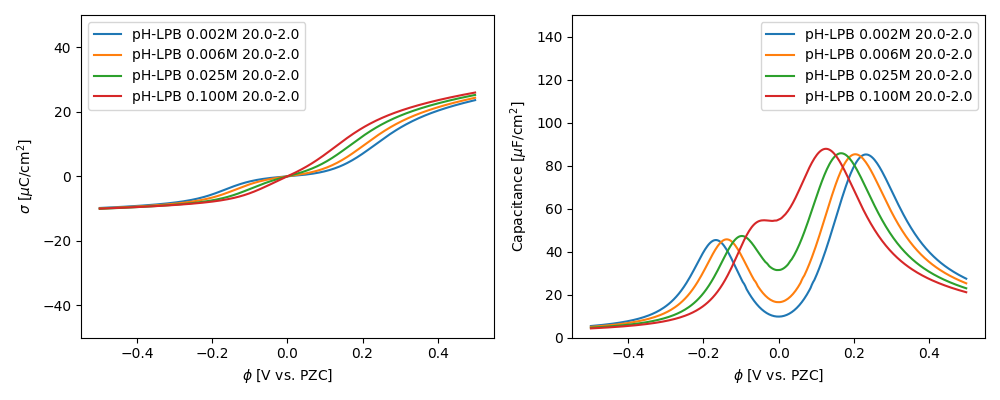

In [2]:
potentials = np.linspace(-0.5, 0.5, 300)

x_list = [2, 6, 25, 100]
sol_list = []

for x in x_list:
    model = edl.ProtonLPB(x * 1e-3, 20, 2, 20, 2)
    sol = model.potential_sweep(potentials, tol=1e-4, p_h=3)
    # sol.cap = 1/(sol.cap**(-1) + 100**(-1))
    sol_list.append(sol)

fig, ax = plotting.plot_potential_sweep(sol_list)
plt.show()